In [24]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df = pd.read_csv('Bank_Customers.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.drop(columns=['RowNumber','CustomerId','Surname','Exited'],axis=1)
y = df['Exited']

In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [6]:

le = preprocessing.LabelEncoder()
X['Gender'] = le.fit_transform(X.Gender)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [7]:

enc = OneHotEncoder()
ohe = pd.get_dummies(X['Geography'])

In [8]:
X = pd.concat([X,ohe],axis=1)

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [10]:
X.drop(columns=['Geography'],axis=1,inplace=True)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:

ann = tf.keras.models.Sequential()

2023-02-22 04:53:54.337300: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [15]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
ann.fit(X_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 0.7308 - accuracy: 0.4993
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.7947
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.8086
Epoch 4/50
219/219 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8159
Epoch 5/50
219/219 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8233
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8307
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8364
Epoch 8/50
219/219 [==============================] - 1s 2ms/step - loss: 0.3868 - accuracy: 0.8426
Epoch 9/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8476
Epoch 10/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8511

In [17]:
y_predict = ann.predict(X_test)
y_predict = (y_predict>0.5)
cm = confusion_matrix(y_test,y_predict)

94/94 [==============================] - 0s 1ms/step


In [18]:
cm

array([[2276,  100],
       [ 320,  304]])

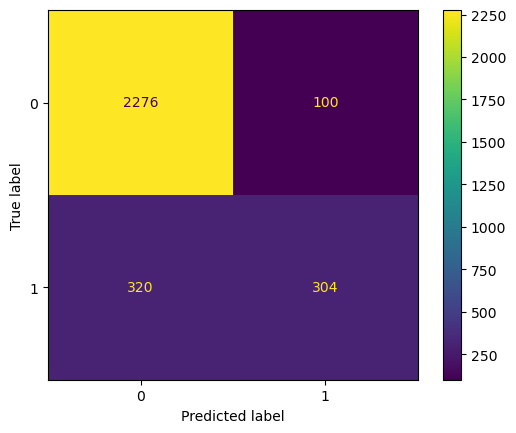

In [26]:
display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
display2.plot()
plt.show()